# Plotting detectability of Macondo in terms of instrumental RV limit

In [2]:
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt
from astropy import constants as const
%matplotlib inline

In [3]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

In [4]:
mstar=0.84*const.M_sun # set stellar mass in solar mass units

In [7]:
per=np.arange(1,200) # set planet period in days

In [8]:
mpla=1*const.M_earth*np.arange(1,300) # set planet masses in earth masses (1,300)

In [9]:
def vel(mp,per,mstar): # calculate rv in m/s
    aux=(mp/const.M_jup)*(29.8*u.m/u.s)*(mstar/const.M_sun)**(-2/3)*(per/365)**(-1/3) # rv
    return aux, np.meshgrid(mp, per)

In [11]:
result, grid = vel(mpla[:,None], per[None,:],mstar) # create velocity(period,mass) grid

In [256]:
result # velocity grid

<Quantity [[8.49941722e-01,6.74599192e-01,5.89316675e-01,...,
            1.46072033e-01,1.45825705e-01,1.45581031e-01],
           [1.69988344e+00,1.34919838e+00,1.17863335e+00,...,
            2.92144065e-01,2.91651410e-01,2.91162061e-01],
           [2.54982517e+00,2.02379757e+00,1.76795003e+00,...,
            4.38216098e-01,4.37477115e-01,4.36743092e-01],
           ...,
           [2.52432691e+02,2.00355960e+02,1.75027053e+02,...,
            4.33833937e+01,4.33102344e+01,4.32375661e+01],
           [2.53282633e+02,2.01030559e+02,1.75616369e+02,...,
            4.35294658e+01,4.34560601e+01,4.33831471e+01],
           [2.54132575e+02,2.01705158e+02,1.76205686e+02,...,
            4.36755378e+01,4.36018858e+01,4.35287281e+01]] m / s>

In [13]:
mpg,ppg=grid # period vs. mass meshgrid

In [17]:
mask=1*(result<3*10*u.m/u.s) # mask that allows to show available detection parameter space 

Text(0.5,1,'Yellow = not-detectable, Purple = detectable')

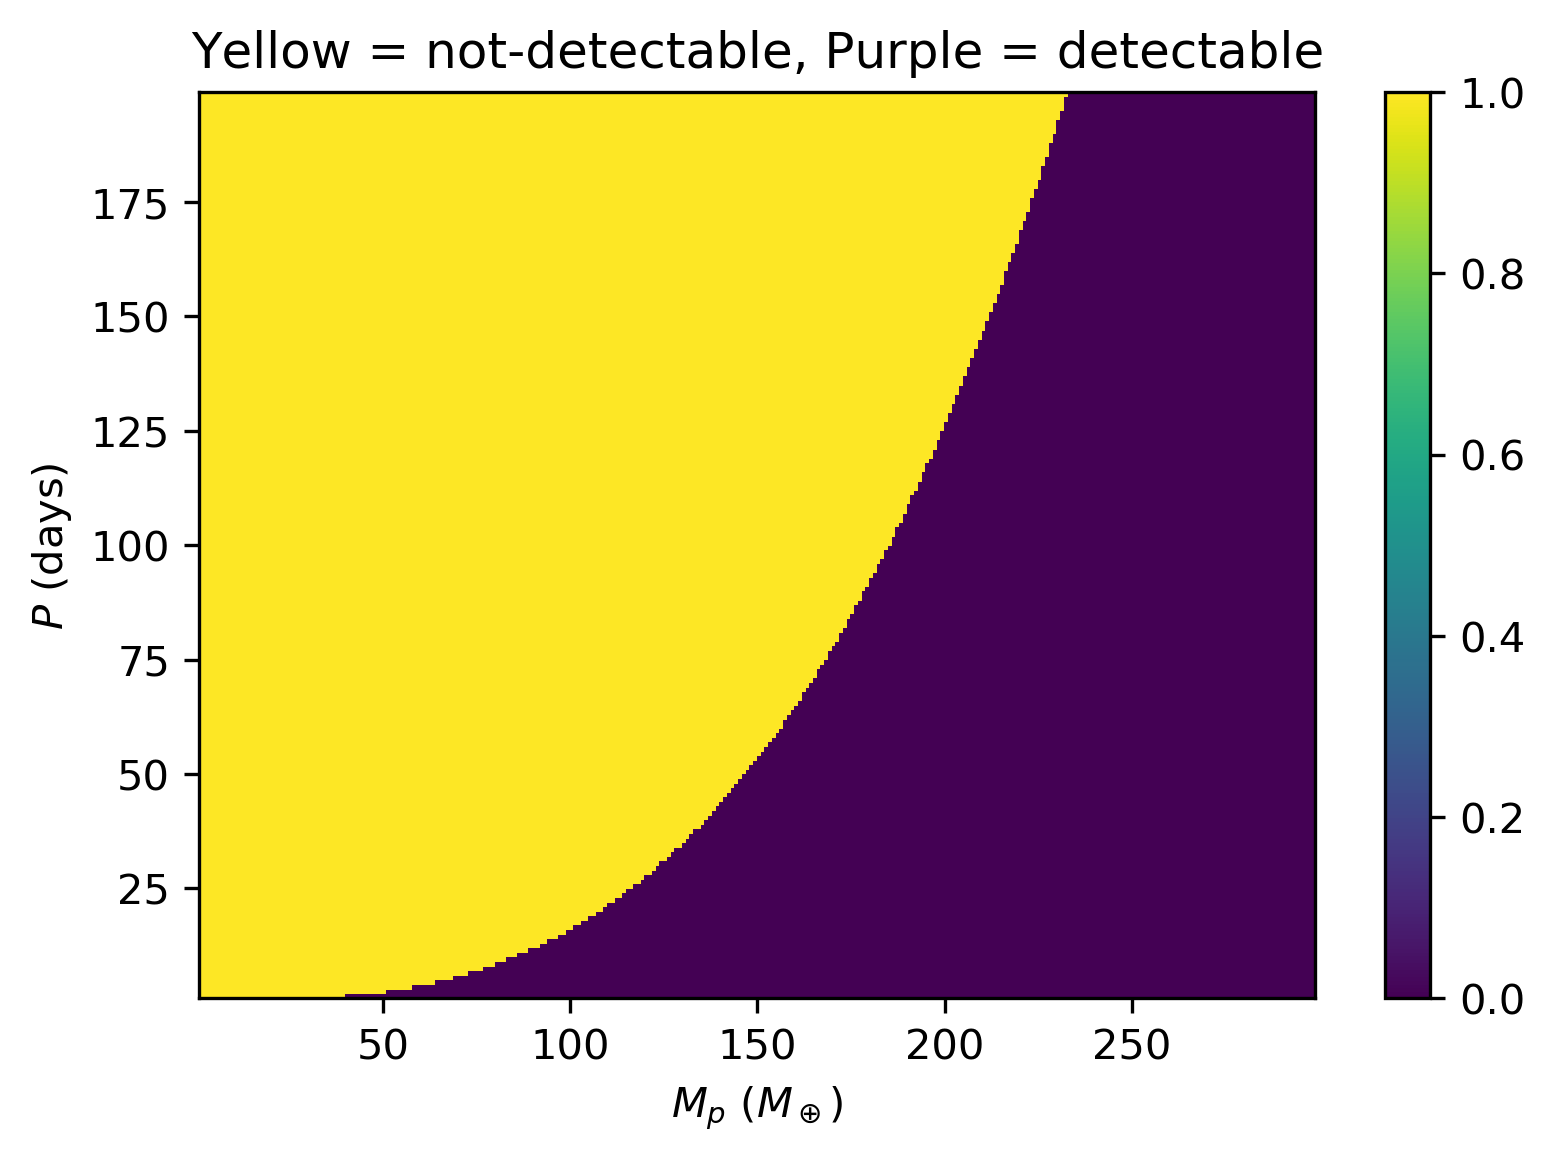

In [18]:
plt.pcolormesh(mpg.to(u.M_earth),ppg,mask.T) # applied mask plot
plt.xlabel(r"$M_p$ ($M_\oplus$)")
plt.ylabel(r"$P$ (days)")
plt.colorbar()
plt.title("Yellow = not-detectable, Purple = detectable")

Text(0.5,1,'$M_\\mathrm{star}=$0.84$M_\\odot$')

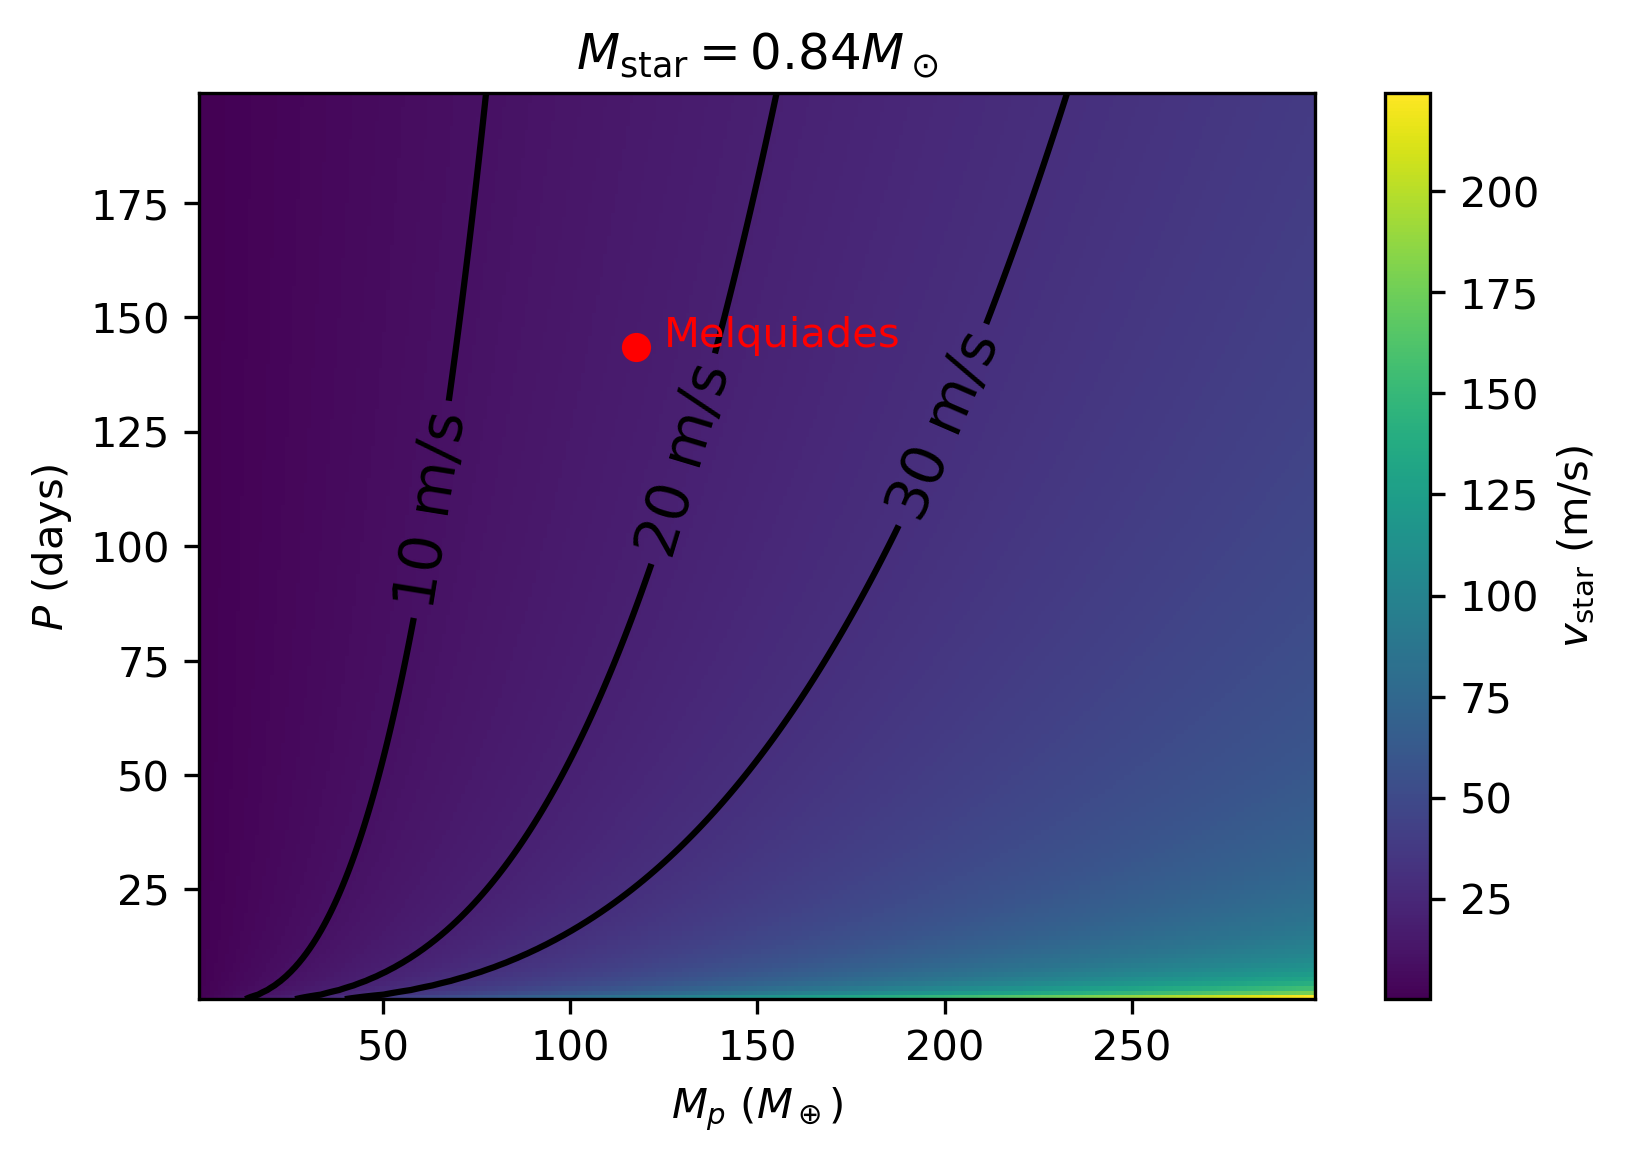

In [14]:
plt.pcolormesh(mpg.to(u.M_earth),ppg,result.T) # plot rv over period-mass meshgrid
plt.colorbar(label=r"$v_\mathrm{star}$ (m/s)") # show color scale for rv
# show contours of constant rv
CS = plt.contour(mpg.to(u.M_earth), ppg, result.T, levels=[10,20,30], colors='k')
plt.clabel(CS, fmt = '%2.1d'+" m/s", colors = 'k', fontsize=14) #contour line labels
plt.xlabel(r"$M_p$ ($M_\oplus$)")
plt.ylabel(r"$P$ (days)")
plt.scatter([117.5],[143.6],c='r') # original melquiades detection
plt.text(125,143.6,"Melquiades",color='r')
plt.title(r"$M_\mathrm{star}=$"+str(mstar/const.M_sun)+r"$M_\odot$")

Text(0.5,1,'$M_\\mathrm{star}=$0.84$M_\\odot$')

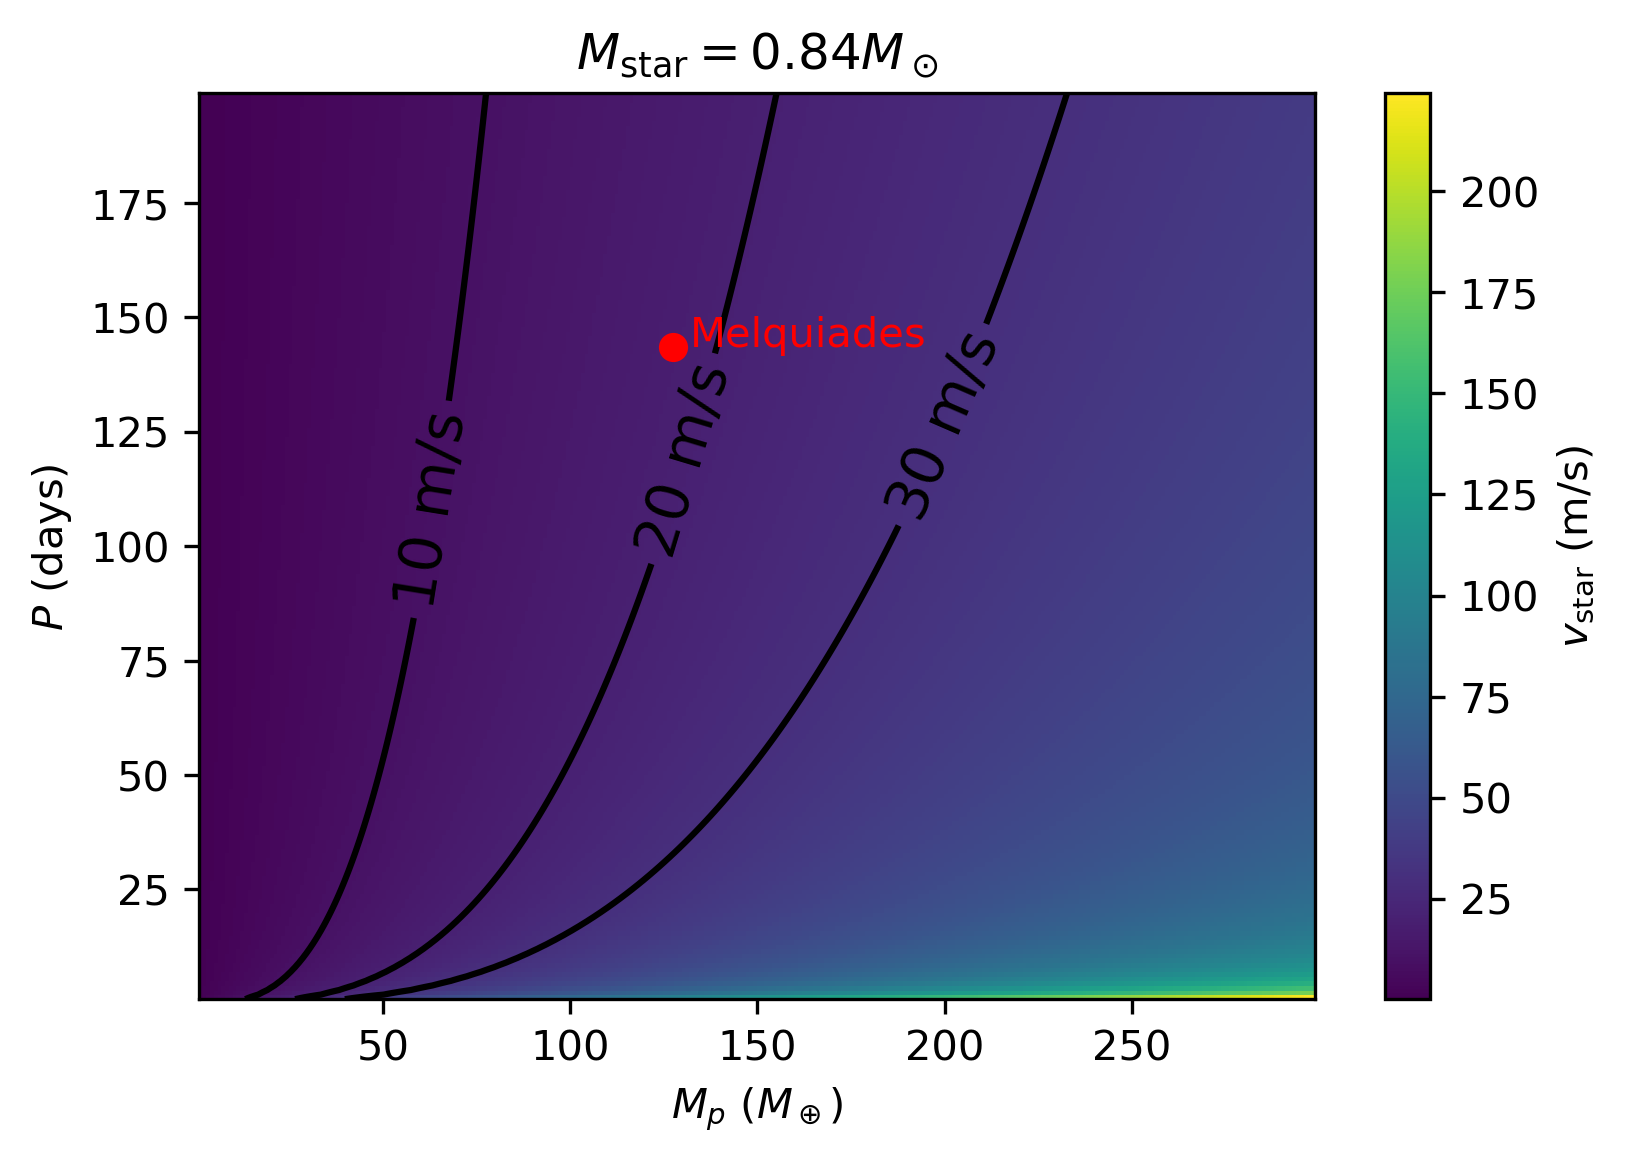

In [15]:
plt.pcolormesh(mpg.to(u.M_earth),ppg,result.T)
plt.colorbar(label=r"$v_\mathrm{star}$ (m/s)")
CS = plt.contour(mpg.to(u.M_earth), ppg, result.T, levels=[10,20,30], colors='k')
plt.clabel(CS, fmt = '%2.1d'+" m/s", colors = 'k', fontsize=14) #contour line labels
plt.xlabel(r"$M_p$ ($M_\oplus$)")
plt.ylabel(r"$P$ (days)")
plt.scatter([127.5],[143.6],c='r') # with newer stellar mass data
plt.text(132,143.6,"Melquiades",color='r')
plt.title(r"$M_\mathrm{star}=$"+str(mstar/const.M_sun)+r"$M_\odot$")